In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

EARTHQUAKES_PATH = os.path.join("..","datasets", "Earthquakes")

def load_earthquake_data(islanders_path=EARTHQUAKES_PATH):
    csv_path = os.path.join(islanders_path, "database.csv")
    return pd.read_csv(csv_path)

earthquakes = load_earthquake_data(EARTHQUAKES_PATH)

#get the first 5 rows of the dataset
earthquakes.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
from sklearn.cluster import KMeans

In [4]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=2, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=8,
                color=cross_color, zorder=2, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [5]:

def interleaf(X,Y):
    if(len(X)>len(Y)):
        iterations = len(X)
    else: 
        iterations = len(Y)
    arr = []
    for i in range(0,iterations):
        if(np.isnan(X[i]) or np.isnan(Y[i])):
            continue
        arr.append([X[i],Y[i]])
    return np.array(arr)

In [6]:
k = 7
kmeans = KMeans(n_clusters=k)
lat_long = interleaf(earthquakes["Longitude"],earthquakes["Latitude"])
y_pred = kmeans.fit_predict(lat_long)

In [7]:
y_pred

array([4, 1, 0, ..., 4, 1, 4], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[-172.36041141,  -25.489681  ],
       [ 117.97349664,    2.81338832],
       [  50.60185581,   26.59158509],
       [ -67.11396914,  -15.9106199 ],
       [ 146.78279487,   40.01698585],
       [-147.33473124,   46.26638587],
       [ 160.6345698 ,  -16.77350866]])

In [9]:
kmeans.labels_

array([4, 1, 0, ..., 4, 1, 4], dtype=int32)

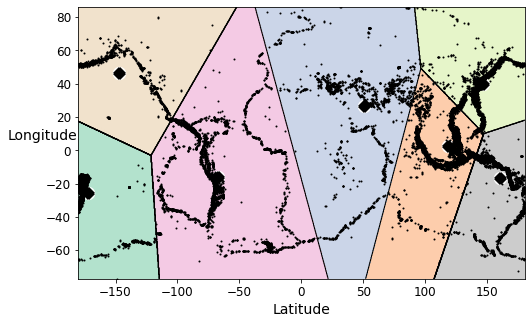

In [10]:
plt.figure(figsize=(8, 5))
plot_decision_boundaries(kmeans, lat_long)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Longitude", fontsize=14)
plt.show()

In [11]:
kmeans.inertia_

15537030.73971124

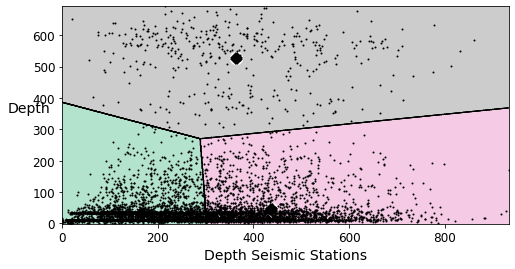

In [58]:
k = 3
kmeans = KMeans(n_clusters=k)
depth = interleaf(earthquakes["Depth Seismic Stations"],earthquakes["Depth"])
y_pred = kmeans.fit_predict(depth)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, depth)
plt.xlabel("Depth Seismic Stations", fontsize=14)
plt.ylabel("Depth", fontsize=14)
plt.show()

In [13]:
kmeans.inertia_

81958913.32944782

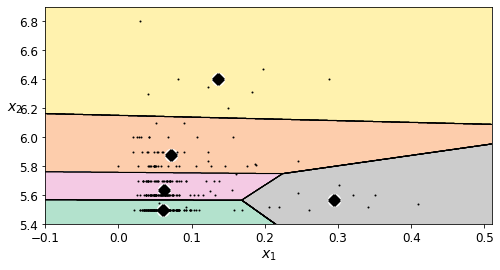

In [14]:
k = 5
kmeans = KMeans(n_clusters=k)
mag_error = interleaf(earthquakes["Magnitude Error"],earthquakes["Magnitude"])
y_pred = []
y_pred = kmeans.fit_predict(mag_error)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, mag_error)
plt.show()

In [15]:
kmeans_iter1 = KMeans(n_clusters=5, algorithm="full", n_init=1, 
                        max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, algorithm="full", n_init=1, 
                        max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, algorithm="full", n_init=1, 
                        max_iter=3, random_state=1)


kmeans_iter1.fit(mag_error)
kmeans_iter2.fit(mag_error)
kmeans_iter3.fit(mag_error)

KMeans(algorithm='full', max_iter=3, n_clusters=5, n_init=1, random_state=1)

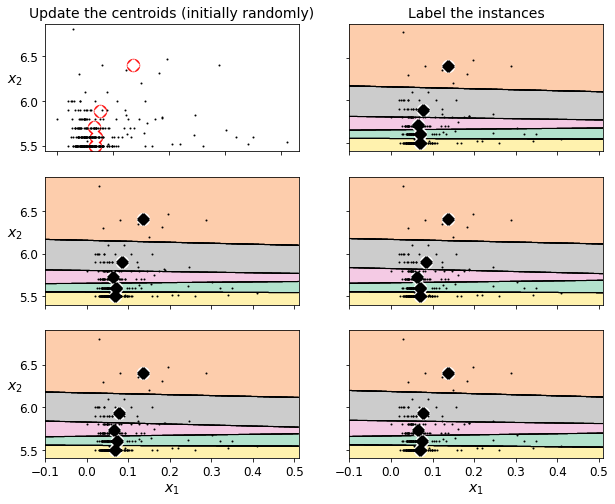

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(mag_error)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, mag_error, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, mag_error, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, mag_error, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, mag_error, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, mag_error, show_ylabels=False)

plt.show()

In [40]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

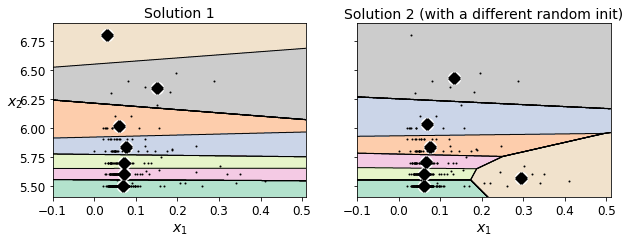

In [18]:
kmeans1 = KMeans(n_clusters=7, n_init=1, algorithm="full", random_state = 21)
kmeans2 = KMeans(n_clusters=7, n_init=1, algorithm="full", random_state = 60)

plot_clusterer_comparison(kmeans1, kmeans2, mag_error,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

The intertia is a measure of how the model performed. It is measured using the distance between each instance and the centroids.

In [19]:
#k value of 5
kmeans.inertia_

1.2731064252293005

The inertia is the sum of squared distances between each trainin instance.

In [20]:
X_dist = kmeans.transform(mag_error)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

1.2731064252289457

In [21]:
kmeans1.inertia_

0.9663819372819216

In [22]:
kmeans2.inertia_

0.7008478649537606

In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init = 10).fit(mag_error)
                for k in range(1, 40)]
inertias = [model.inertia_ for model in kmeans_per_k]

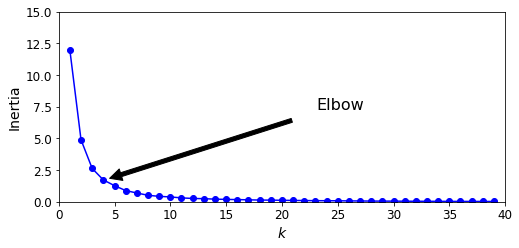

In [48]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 40), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2.5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([0, 40, 0, 15])
plt.show()

The elbow is at $k = 4$, meaning past $4$ clusters we see diminishing returns on out classifactions for time to compute and may cut clusters in half.

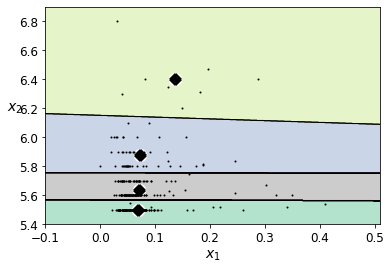

In [49]:
plot_decision_boundaries(kmeans_per_k[3], mag_error)
plt.show()

Upon inspection, I wouldn't say this is the best classifaction. Though it is good, there are clusters alligned on different distint $y$ coordinates, that have been grouped in the same class despite visually being very seperated.

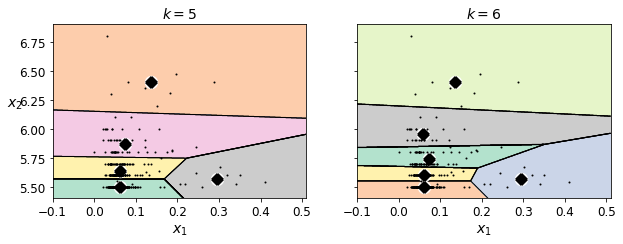

intertia of k = 5 1.273603504106452
intertia of k = 6 0.8865233705616075


In [52]:
plot_clusterer_comparison(kmeans_per_k[4], kmeans_per_k[5], mag_error, "$k=5$", "$k=6$")
plt.show()
print("intertia of k = 5",kmeans_per_k[4].inertia_)
print("intertia of k = 6",kmeans_per_k[5].inertia_)

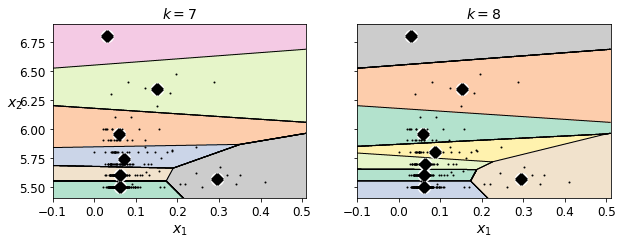

intertia of k = 7 0.6941465669901788
intertia of k = 8 0.5145855577840586


In [53]:
plot_clusterer_comparison(kmeans_per_k[6], kmeans_per_k[7], mag_error, "$k=7$", "$k=8$")
plt.show()
print("intertia of k = 7",kmeans_per_k[6].inertia_)
print("intertia of k = 8",kmeans_per_k[7].inertia_)

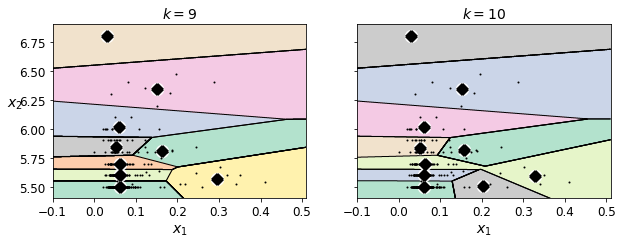

intertia of k = 9 0.4301414153159001
intertia of k = 10 0.38275890889683606


In [55]:
plot_clusterer_comparison(kmeans_per_k[8], kmeans_per_k[9], mag_error, "$k=9$", "$k=10$")
plt.show()
print("intertia of k = 9",kmeans_per_k[8].inertia_)
print("intertia of k = 10",kmeans_per_k[9].inertia_)

I would argue that $k=8$ is the best value for clustering as it more accurately seperates the different classes by their distint y values. There is a large class to the bottom right of the graph that could be said to capture all the outlyers. Alternatively, it could be seen as classes being cut in half.

$k = 9$ cuts too many classes in half so I would argue that clusters past $k = 9$ offer worse results for more time.

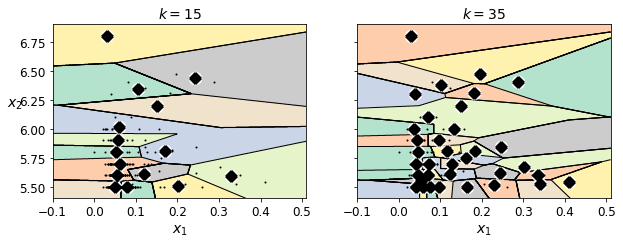

intertia of k = 15 0.18987561342255058
intertia of k = 35 0.034333325215690394


In [56]:
plot_clusterer_comparison(kmeans_per_k[14], kmeans_per_k[34], mag_error, "$k=15$", "$k=35$")
plt.show()
print("intertia of k = 15",kmeans_per_k[14].inertia_)
print("intertia of k = 35",kmeans_per_k[34].inertia_)

Just for fun I looked at the models for silly values of k. Despite having the lowest intertia values yet, they are clearly overfitted.

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init = 10).fit(lat_long)
                for k in range(1, 40)]
inertias = [model.inertia_ for model in kmeans_per_k]

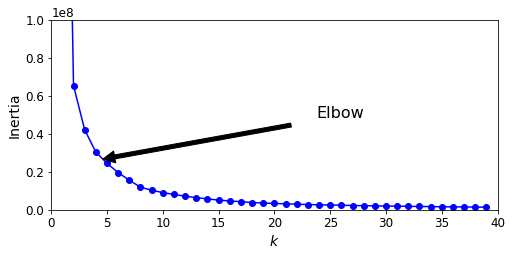

intertia of k = 39 1374332.856968234


In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 40), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2.5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([0, 40, 0, 100000000])
plt.show()

print("intertia of k = 39",kmeans_per_k[38].inertia_)

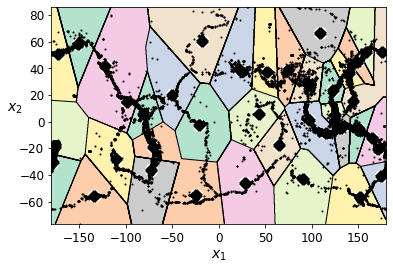

In [33]:
plot_decision_boundaries(kmeans_per_k[38], lat_long)
plt.show()

In [34]:
from sklearn.mixture import GaussianMixture
from itertools import cycle, islice

def gaussianMix(X, n_clusters):

    gmm = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=69)
    gmm.fit(X)

    y_pred = gmm.predict(X)

    colors = np.array(
        list(
            islice(
                cycle(
                    [ "#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628",
                        "#984ea3", "#999999", "#e41a1c", "#dede00"]
                ),
                int(max(y_pred) + 1),
            )
        )
    )

    # add black color for outliers (if any)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.show()

    print(gmm.bic(X))



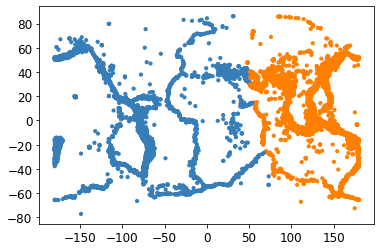

493082.1140728133


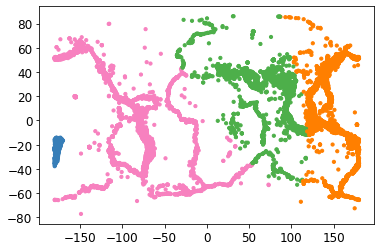

470320.7433442434


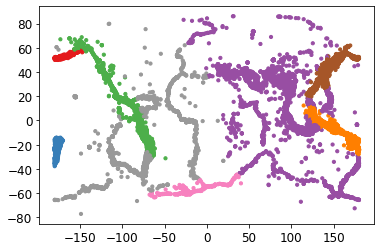

443265.35617404536


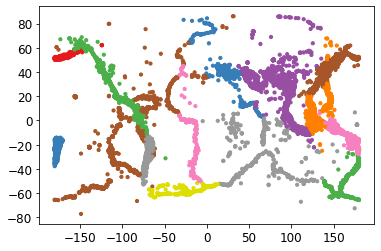

426800.05313293525


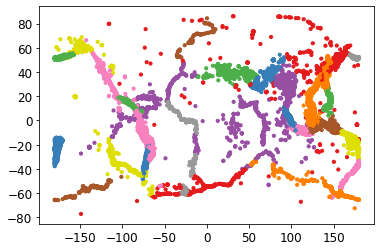

405229.39935297833


In [35]:

gaussianMix(lat_long,2)
gaussianMix(lat_long,4)
gaussianMix(lat_long,8)
gaussianMix(lat_long,16)
gaussianMix(lat_long,32)


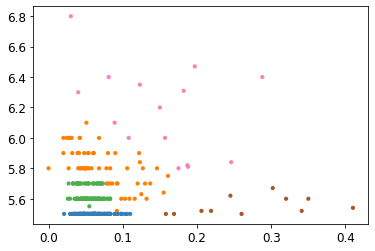

-2755.309993429612


In [36]:
gaussianMix(mag_error,5)

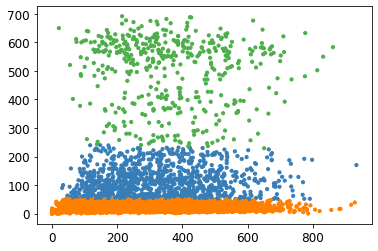

161520.02112860008


In [37]:
gaussianMix(depth,3)

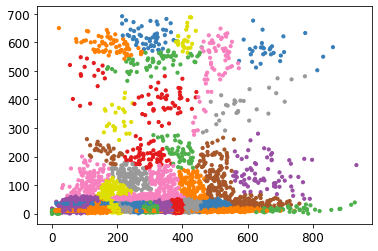

131266.14433327256


In [38]:
gaussianMix(depth,40)